<a href="https://colab.research.google.com/github/RobertLJordan/Stock-Models/blob/master/Enpahse_Stock_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip install quandl
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas_datareader as web

In [117]:
df = web.DataReader('ENPH', data_source='yahoo', start='2013-01-01', end= '2020-06-19')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,3.89,3.69,3.87,3.79,234600,3.79
2013-01-03,3.88,3.66,3.84,3.73,155400,3.73
2013-01-04,3.98,3.70,3.76,3.90,221200,3.90
2013-01-07,3.90,3.64,3.90,3.75,202300,3.75
2013-01-08,3.81,3.70,3.80,3.71,68400,3.71


In [118]:
df= df[['Adj Close']]

In [119]:
df

,Adj Close
Date,
2013-01-02,3.790000
2013-01-03,3.730000
2013-01-04,3.900000
2013-01-07,3.750000
2013-01-08,3.710000
...,...
2020-06-15,50.450001
2020-06-16,52.759998
2020-06-17,39.040001


In [120]:
forecast_out = 30
#Create another column (the target or dependant variable) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-1)
df.head()

,Adj Close,Prediction
Date,,
2013-01-02,3.79,3.73
2013-01-03,3.73,3.90
2013-01-04,3.90,3.75
2013-01-07,3.75,3.71
2013-01-08,3.71,3.75


In [121]:
### create the independent data set (X)
#conver the datfram to a numpy array
X = np.array(df.drop(['Prediction'], 1))
#remove the last 'n' rows
X= X[:-forecast_out]

In [122]:
print (X)

[[ 3.78999996]
 [ 3.73000002]
 [ 3.9000001 ]
 ...
 [44.36999893]
 [52.68000031]
 [54.49000168]]


In [123]:
### Create the dependent data set (y)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
y

array([ 3.73000002,  3.9000001 ,  3.75      , ..., 52.68000031,
       54.49000168, 57.27999878])

In [124]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [125]:
# Create and train the Support Vector Regressor
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [126]:
#Testing Model: Score returns the coefficient of determination R^2
#the best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
svm_confidence

0.9875733290112569

In [127]:
#Create and train the linear regression model
lr = LinearRegression()
#Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
#Testing Model: Score returns the coefficient of determination R^2
#the best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
lr_confidence

0.9960767118977375

In [129]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj Close column
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]

In [130]:
x_forecast

array([[57.27999878],
       [59.58000183],
       [59.27000046],
       [57.47000122],
       [56.97999954],
       [58.38000107],
       [64.41999817],
       [67.04000092],
       [64.16999817],
       [59.93000031],
       [56.41999817],
       [58.43000031],
       [57.86000061],
       [55.79999924],
       [58.18999863],
       [59.68000031],
       [56.95000076],
       [53.31999969],
       [51.63999939],
       [54.59000015],
       [52.90000153],
       [51.58000183],
       [49.34999847],
       [47.65999985],
       [48.63000107],
       [50.45000076],
       [52.75999832],
       [39.04000092],
       [45.72000122],
       [46.72000122]])

In [131]:
#print the linear regression prediction for the next 'n' days
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([57.49325356, 59.80156509, 59.49044387, 57.68394236, 57.19217061,
       58.59722947, 64.65904531, 67.28851249, 64.40814222, 60.15282789,
       56.63014631, 58.64740932, 58.07535058, 56.00790771, 58.40654067,
       59.90192479, 57.16206347, 53.51894947, 51.83288038, 54.79353765,
       53.09743411, 51.77266608, 49.53460712, 47.83850358, 48.81200881,
       50.63858303, 52.95692517, 39.18736598, 45.89149695, 46.89510933])

In [132]:
#print the support vector regresor prediction for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
svm_prediction

array([58.30202852, 47.69060728, 52.59969798, 59.79328691, 55.65922517,
       61.65980008, 26.77764032, 28.14292702, 26.36098945, 41.85029561,
       51.20070532, 61.42931613, 61.88382904, 49.32767547, 62.19536121,
       46.02978928, 55.39031271, 58.08512504, 47.80336908, 55.39872601,
       55.90678296, 47.58642141, 48.38576388, 36.02517499, 44.50794787,
       47.66612696, 54.96007594, 38.95684643, 40.36578943, 32.95694313])

In [133]:
svm_prediction_df = pd.DataFrame(svm_prediction, columns={'Predicted_Price'})
svm_prediction_df = svm_prediction_df[::-1].reset_index(drop=True)# reverse the order of index

In [134]:
svm_prediction_df['Date'] = pd.date_range('today', periods=len(svm_prediction_df), freq='D').normalize()

In [135]:

svm_prediction_df

,Predicted_Price,Date
0,32.956943,2020-06-23
1,40.365789,2020-06-24
2,38.956846,2020-06-25
3,54.960076,2020-06-26
4,47.666127,2020-06-27
5,44.507948,2020-06-28
6,36.025175,2020-06-29
7,48.385764,2020-06-30
8,47.586421,2020-07-01
9,55.906783,2020-07-02


In [136]:
svm_prediction_df.set_index('Date', inplace=True)

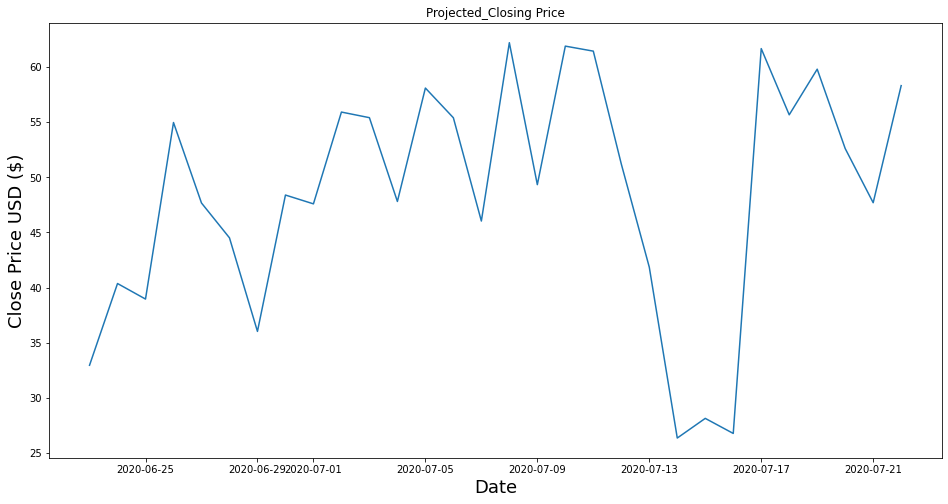

In [137]:
#Visualize the closing price history
plt.figure(figsize=(16,8)) #give plot a size
plt.title('Projected_Closing Price') # give plot a title
plt.plot(svm_prediction_df['Predicted_Price']) #give plot some data
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()